In [ ]:
# The office hour will start in 5 minutes. 

# During the office hour, you can clarify and ask questions about course content.
# You can also talk about problems regarding your reading, code, etc. 
# I am glad to explain and help. Let us begin soon!

Bullet points:

* To be able to run the code, it's recommended to put this demo into /resources directory.
* Often use dir() and help() function to understand the methods and functions

In [ ]:
# Import pandas and datetime

import pandas as pd
from datetime import datetime

In [ ]:
# Convert objects or string to datetime 
pd.to_datetime('2020-09-21 2:10pm')

Timestamp('2020-09-21 14:10:00')

In [ ]:
# In pandas, a single point in time is represented as a Timestamp. 
pd.to_datetime('09/21/2020')

Timestamp('2020-09-21 00:00:00')

In [ ]:
pd.to_datetime('09/01/2020', dayfirst = True)

Timestamp('2020-01-09 00:00:00')

In [ ]:
type(pd.to_datetime('09/21/2020'))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# If we supply a list or array of strings as input to to_datetime(), 
# it returns a sequence of date/time values in a DatetimeIndex object, 
# which is the core data structure that powers much of pandas time series functionality.

pd.to_datetime(['2018-05-05', '7/1/1997', 'Mar 31, 1995'])

DatetimeIndex(['2018-05-05', '1997-07-01', '1995-03-31'], dtype='datetime64[ns]', freq=None)

In [ ]:
type(pd.to_datetime(['2018-05-05', '7/1/1997', 'Mar 31, 1995']))

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# The data type datetime64[ns] indicates that the underlying data is stored as 64-bit 
# integers, in units of nanoseconds (ns).

# This data structure allows pandas to 
# compactly store large sequences of date/time values and efficiently perform 
# vectorized operations using NumPy datetime64 arrays

In [ ]:
# If we’re dealing with a sequence of strings all in the same date/time format, 
# we can explicitly specify it with the format parameter. 

# We use the format codes %m (numeric month), %d (day of month), and 
# %y (2-digit year) to specify the format.

pd.to_datetime(['12/25/19', '8/23/17', '12/15/12'], format = '%m/%d/%y')

DatetimeIndex(['2019-12-25', '2017-08-23', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## Open Power Systems Data

The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

The 5 columns:

* Date — The date (yyyy-mm-dd format)
* Consumption — Electricity consumption in GWh
* Wind — Wind power production in GWh
* Solar — Solar power production in GWh
* Wind+Solar — Sum of wind and solar power production in GWh

In [ ]:
# Let's import the data 
# We choose the first column as index
# And parse the first column as datetime when reading the file
# This is an alternative to writing df['date'] = pd.to_datetime(df['date'], format='%d%b%Y')
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col = 0, parse_dates = True)
opsd_daily.shape

(4383, 4)

In [ ]:
opsd_daily.loc['2014'].head(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-01,1080.080,220.085,30.493,250.578,2014,1,2
2014-01-02,1343.101,304.166,13.680,317.846,2014,1,3
2014-01-03,1379.776,340.639,23.510,364.149,2014,1,4


In [ ]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday

In [ ]:
opsd_daily.loc['2017-08-10']

Consumption     1351.491
Wind             100.274
Solar             71.160
Wind+Solar       171.434
Year            2017.000
Month              8.000
Weekday Name       3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [ ]:
# We can subset by .loc()
# Using loc function to slice a group of rows and columns for datetime is Right inclusive
#opsd_daily.loc['2014-01-01': '2014-02-02']
opsd_daily.loc['2014-01-01': '2014-02-02': 2]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-01,1080.080,220.085,30.493,250.578,2014,1,2
2014-01-03,1379.776,340.639,23.510,364.149,2014,1,4
2014-01-05,1182.416,175.812,18.067,193.879,2014,1,6
2014-01-07,1529.250,363.756,44.463,408.219,2014,1,1
2014-01-09,1572.194,430.360,23.977,454.337,2014,1,3
2014-01-11,1350.439,308.404,23.923,332.327,2014,1,5
2014-01-13,1582.797,124.885,21.976,146.861,2014,1,0
2014-01-15,1592.384,85.850,30.897,116.747,2014,1,2
2014-01-17,1571.637,121.368,20.624,141.992,2014,1,4


In [ ]:
# Partial indexing
opsd_daily.loc['2014-05'].head(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-05-01,1099.884,52.133,108.002,160.135,2014,5,3
2014-05-02,1308.181,119.131,80.413,199.544,2014,5,4
2014-05-03,1196.095,69.523,104.548,174.071,2014,5,5


In [ ]:
# With pandas and matplotlib, we can easily visualize our time series data.
# Let's import matplotlib

import matplotlib.pyplot as plt

In [ ]:
# We’ll use seaborn styling for our plots, and let’s adjust the default figure size 
# to an appropriate shape for time series plots.

import seaborn as sns
sns.set(rc = {'figure.figsize': (10, 5)})

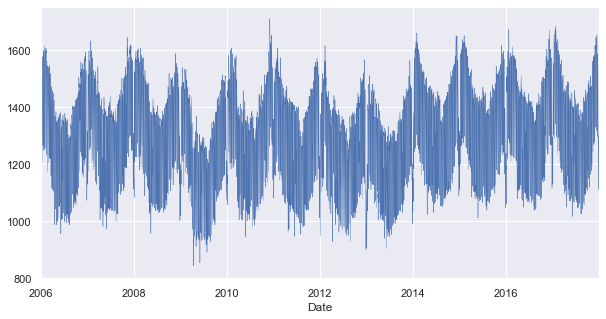

In [ ]:
# .plot() in DataFrame method
# Let's create a line of the 12-year analysis of Germany's daily electricity consumption
# Specify the linewidth, probably reduce the number
opsd_daily['Consumption'].plot(linewidth = 0.4)

* You can observe seasonality occurs at every year from 2006 to 2017. Seasonality is one of the most interesting characteristics in time series data.

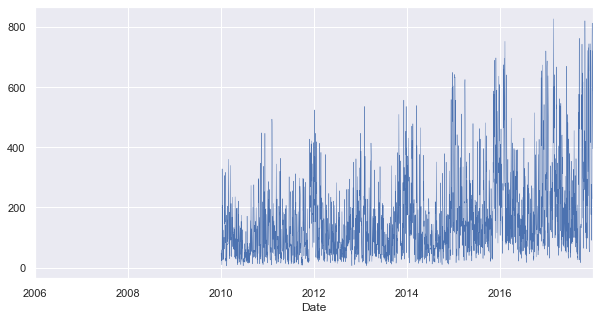

In [ ]:
# Let's plot the line for 12-year analysis of Germany's daily wind power production
opsd_daily['Wind'].plot(linewidth = 0.4)

* One remarkable observation from the graph is that Wind energy production data wasn't collected prior to 2010.

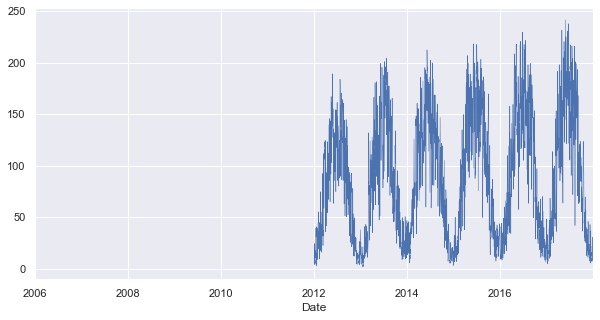

In [ ]:
# Solar — Solar power production in GWh
opsd_daily['Solar'].plot(linewidth = 0.5)

In [ ]:
# Recap: we can specify 2014-07 to view all July 2014 data entries
opsd_daily['2014-07']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-07-01,1407.234,61.670,176.137,237.807,2014,7,1
2014-07-02,1418.936,61.838,145.466,207.304,2014,7,2
2014-07-03,1424.626,61.293,202.577,263.870,2014,7,3
2014-07-04,1401.193,65.633,185.181,250.814,2014,7,4
2014-07-05,1192.741,111.218,121.664,232.882,2014,7,5
2014-07-06,1096.519,101.609,180.376,281.985,2014,7,6
2014-07-07,1415.363,73.447,140.347,213.794,2014,7,0
2014-07-08,1455.751,111.337,59.153,170.490,2014,7,1
2014-07-09,1446.773,144.955,67.393,212.348,2014,7,2


Text(0, 0.5, 'Daily Electricity Consumption (GWh)')

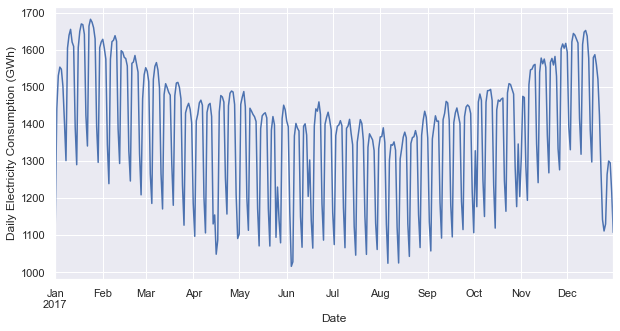

In [ ]:
# We can look at the seasonality by subsetting a year of data and plot
# By looking into the seasonality in a year, we can also try to observe if
# week seasonality/month seasonality exists in those columns

ax = opsd_daily.loc['2017', 'Consumption'].plot()
# We want the y-labels be (Daily Electricity Consumption (GWh))
ax.set_ylabel('Daily Electricity Consumption (GWh)')

### Interpretation

* We can clearly see the weekly oscillations

* Weekly oscillations are mostly consistent

* It's apparent at year level of granularity that drastic decrease in electricity consumption during Christmas and potentially the HAPPY NEW YEAR transpire. LED christmas lights are really efficient! (By Cliff)

* Stuff like factories stop operating?

Text(0, 0.5, 'Daily Solar Production (GWh)')

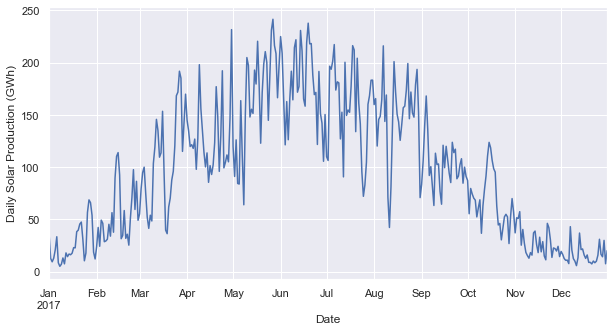

In [ ]:
ax = opsd_daily.loc['2017', 'Solar'].plot()
# We want the y-labels be (Daily Solar Production (GWh))
ax.set_ylabel('Daily Solar Production (GWh)')

### Interpretation

* During the summer months, the solar production tends to be higher compared to that in winter

* The monsoon seasons in Germany is a factor governing the spike/drop of solar energy production

* You can see some huge leaps between days in summer, which may represent how random climate factors have significantly influenced the solar energy production on specific (consecutive) days.

## Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Let's define the five number summary:

* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset. It's shown as the lowest point of the box

* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset. It's shown as the highest point of the box

* interquartile range (IQR): the range between 25th to the 75th percentile.

* “maximum”: Q3 + 1.5*IQR

* “minimum”: Q1 -1.5*IQR

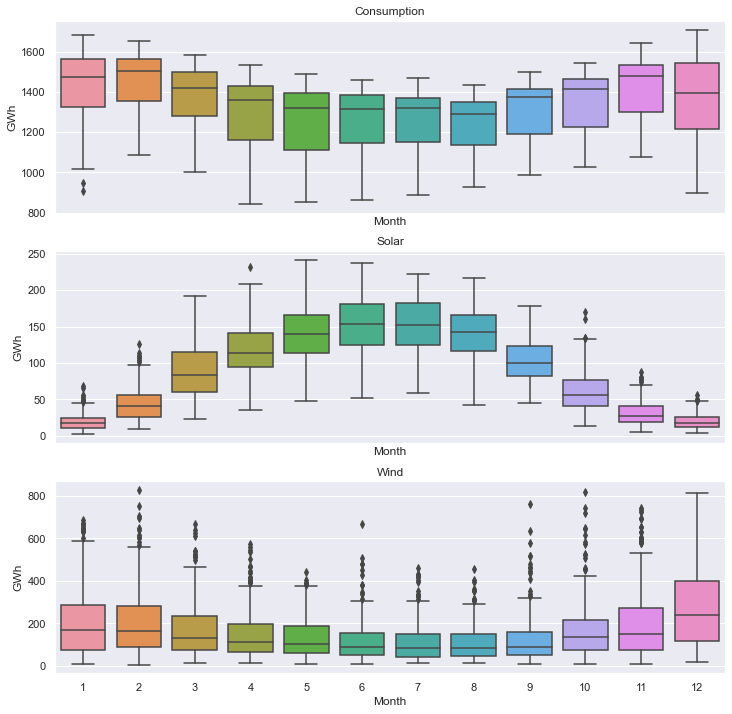

In [ ]:
# Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() function

# group the data by different time periods and display the distributions for each group

# Specify the rows, columns in a subplot
# Specify figure size using a tuple
# Box in Boxplot represents 25% and 75%
# Observation which goes beyond or beneath the two lines are considered outliers


fig, axes = plt.subplots(3, 1, figsize = (12, 12), sharex = True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data = opsd_daily, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

## How to interpret the boxplot?? 

# Correlation

The stats.pearsonr function takes two arrays as input and returns two float values, the **Pearson's correlation** and the **p-value**.

You can see in the documentation that correlation takes a value between -1 and +1, with 0 implying no correlation. We define

* Positive Correlation: The increase of column A is associated with the increase of column B
* Negative Correlation: The increase of column A is associated with the decrease of column B
* Strong Corrlation: The change of value in column A is approximately linear to the change of values of column B
* Exact linear relationship: When correlation equals 1 or -1, two columns form an exact linear relationship

In [ ]:
# We can use .corr() to obtain a matrix of variable-pair correlation
# By default, .corr() method uses pearson correlation
opsd_daily.corr()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Consumption,1.000000,0.133076,-0.279543,0.027648,0.245311,-0.095879,-0.583504
Wind,0.133076,1.000000,-0.308832,0.924745,0.347796,0.041196,0.022162
Solar,-0.279543,-0.308832,1.000000,0.076394,0.130046,-0.083739,-0.004921
Wind+Solar,0.027648,0.924745,0.076394,1.000000,0.416641,0.009679,0.021264
Year,0.245311,0.347796,0.130046,0.416641,1.000000,-0.000881,0.003345
Month,-0.095879,0.041196,-0.083739,0.009679,-0.000881,1.000000,0.001802
Weekday Name,-0.583504,0.022162,-0.004921,0.021264,0.003345,0.001802,1.000000


In [ ]:
opsd_daily.dropna(inplace = True)

In [ ]:
import scipy.stats as stats
corr, p_value = stats.pearsonr(opsd_daily.Consumption, opsd_daily.Wind)
print(corr, p_value)

0.1330759524174559 4.1682414913764916e-10


# Interpret p-values and correlation

* The underlying framework for p-value is hypothesis testing. We would validate or nullify a certain claim using hypothesis testing on data. The first thing we should know is null hypothesis. You can find very detailed tutorial about null hypothesis, so I just describe that in this problem, the null hypothesis is that 

**Higher consumption of energy is not correlated with the higher production of wind**

* The alternative hypothesis states that Higher consumption of energy is correlated with the higher production of wind.

* p-value is the probability that we observed a correlation between consumption of energy and wind energy production to be as extreme as, or more extreme than the correlation we observed (0.1330759524174559) by chance.

* That probability is 4.1682414913764916e-10, which is very low. A nearly zero p-value means that it is highly unlikely to observe that by change, assuming that the null hypothesis is true.

* To test the hypothesis, we will choose a significance level (\alpha) as threshold, where commonly used alpha values are 0.05, 0.01. We say that we have sufficient evidence to reject the null hypothesis and in favor of the alternative hypothesis if the p-value is lower than the specified value (alpha).

* Since the p-value is less than the significance level, we conclude that:

**higher consumption of energy is a statistically significant factor associated with the higher production of wind energy**


In [ ]:
corr, p_value = stats.pearsonr(opsd_daily.Consumption, opsd_daily.Solar)
print(corr, p_value)

-0.27954273185828227 1.505758301064772e-40


## How to interpret the p-values and correlation?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>